🩺 Projeto: Previsão de doença cardíaca

O objetivo é prever se um paciente tem ou não doença cardíaca com base em seus dados clínicos

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

dados = pd.read_csv('heart_disease_uci.csv')

dados.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


📍 Análise Exploratória

In [2]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [3]:
dados.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


📌 Os dados estão em escalas diferentes

In [4]:
dados.isnull().sum()
porcentagem_nulos = (dados.isnull().sum() / len(dados)) * 100
print(porcentagem_nulos)

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64


📍 Tratamento de dados nulos

In [5]:
dados.drop(columns=['ca', 'thal', 'slope'], inplace=True) # Porcentgem alta de nulos

# Colunas com porcentagem pequena de nulos, preencher com a mediana
colunas_numericas_imputar = ['trestbps', 'chol', 'thalch', 'oldpeak']
for coluna in colunas_numericas_imputar:
    mediana = dados[coluna].median()
    dados[coluna] = dados[coluna].fillna(mediana)

# Colunas com porcentagem pequena de nulos, preencher com a moda
colunas_categoricas_imputar = ['fbs', 'restecg', 'exang']
for coluna in colunas_categoricas_imputar:
    moda = dados[coluna].mode()[0]  
    dados[coluna] = dados[coluna].fillna(moda)
dados.isnull().sum()

# Transformar a coluna nums na target

dados['target'] = (dados['num'] > 0).astype(int)
dados.drop('num', axis=1, inplace=True)

/tmp/ipykernel_130206/3868390985.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados[coluna] = dados[coluna].fillna(moda)


📍 Tratamento de dados categóricos

In [7]:
colunas_categoricas = dados.select_dtypes(include=['object', 'category']).columns

dados_encoded = pd.get_dummies(dados, columns=colunas_categoricas, drop_first=True)

📍 Preparando os dados

In [8]:
X = dados_encoded.drop('target', axis=1)
y = dados_encoded['target']

📍 Separar dados em teste e treino para treinar o modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronização dos dados
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train_scaled, y_train)

y_pred = modelo.predict(X_test_scaled)

📍 Análises


Acurácia do modelo: 0.82

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78        75
           1       0.86      0.83      0.85       109

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184


Matriz de Confusão:


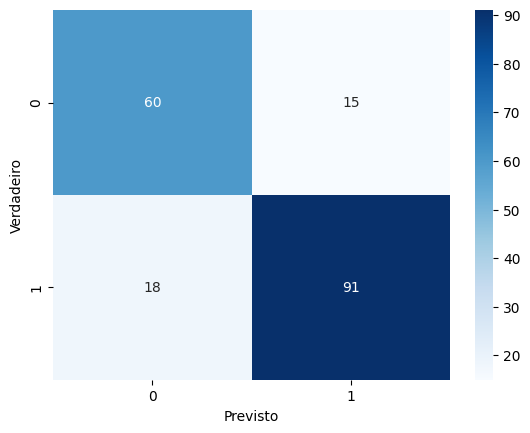

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo: {accuracy:.2f}")

# Exibindo o relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Criando e exibindo a matriz de confusão
print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()